In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import datetime
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import spacy

import pattern
from pattern.en import lemma, lexeme

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import spacy

import pattern
from pattern.en import lemma, lexeme

from wordcloud import WordCloud, STOPWORDS

In [2]:
with open('alexa_grouped.pkl','rb') as read_file:
    alexa_df = pickle.load(read_file)

alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
0,5,31-Jul-18,Echo,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Echo,Loved it!,1,9,love
2,4,31-Jul-18,Echo,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...
3,5,31-Jul-18,Echo,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Echo,Music,1,5,music


In [3]:
alexa_df['variation'].unique()

array(['Echo', 'Echo Spot', 'Echo Show', 'Echo Plus', 'Echo Dot'],
      dtype=object)

In [4]:
alexa_df = alexa_df[alexa_df['variation']!='Echo Show']
alexa_df = alexa_df[alexa_df['variation']!='Echo Spot']
alexa_df['variation'].unique()

array(['Echo', 'Echo Plus', 'Echo Dot'], dtype=object)

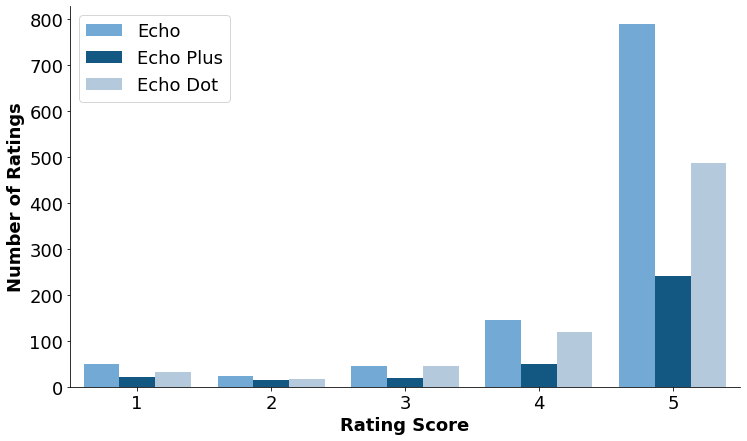

''

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(1, figsize=(12,7))
# ax = sns.countplot(hue='variation', x='rating', data=alexa_df, palette=['#be8ed7','#8165af','#aa9dd4'])
ax = sns.countplot(hue='variation', x='rating', data=alexa_df, palette=['#63ace5','#005b96','#adcbe3'])

ax.tick_params(axis='both', labelsize=18)  #set both x & y ticks 

plt.xlabel('Rating Score', fontsize=18, weight = 'bold')
# x_ticks = range(1, 6)
# ax.set_xticklabels(labels=x_ticks, fontsize=14)

plt.ylabel('Number of Ratings', fontsize=18, weight = 'bold')

plt.legend(fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

# fig.savefig('echos_rating_overview_blue.jpg')
;

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
analyser = SentimentIntensityAnalyzer()

In [8]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [9]:
# echo plus
with open('echo_plus.pkl','rb') as read_file:
    plus_df = pickle.load(read_file)

plus_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
1750,4,31-Jul-18,Echo Plus,We use Alexa primarily for listening to music ...,1,205,use alexa primarily listen music check weather...
1751,5,31-Jul-18,Echo Plus,Plug n Play set up is simple. Added battery ba...,1,103,plug n play set simple add battery base make p...
1752,5,30-Jul-18,Echo Plus,Great speaker i n this! I love this so much mo...,1,126,great speaker n love much alexa tap -PRON- ’s ...
1753,4,30-Jul-18,Echo Plus,She's [Alexa] a bit dense and still learning t...,1,99,alexa bit dense still learn way phrase thing n...
1754,5,30-Jul-18,Echo Plus,Great sound and easy to set up. Purchased the ...,1,155,great sound easy set purchase echo plus build ...


In [10]:
plus_sentiment = sentimentScore(plus_df['reviews'])

{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.9201}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.39, 'pos': 0.61, 'compound': 0.9337}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.872}
{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound': 0.7906}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.11, 'neu': 0.638, 'pos': 0.252, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.037, 'neu': 0.667, 'pos': 0.296, 'compound': 0.8511}
{'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'compound': 0.8714}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}
{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 

In [11]:
plus_sentiment_df = pd.DataFrame(plus_sentiment)
# plus_sentiment_df.columns =['plus_compound','plus_neg','plus_neu','plus_pos']
plus_sentiment_df.head()

,compound,neg,neu,pos
0,0.9201,0.0,0.550,0.450
1,0.3400,0.0,0.833,0.167
2,0.9337,0.0,0.390,0.610
3,0.0000,0.0,1.000,0.000
4,0.8720,0.0,0.548,0.452


In [12]:
plus_df.index = plus_sentiment_df.index
plus_sentiment_df['rating_1'] = plus_df['rating']
plus_vader = pd.concat([plus_df, plus_sentiment_df], axis=1)
plus_vader.head()

,rating,date,variation,verified_reviews,feedback,length,reviews,compound,neg,neu,pos,rating_1
0,4,31-Jul-18,Echo Plus,We use Alexa primarily for listening to music ...,1,205,use alexa primarily listen music check weather...,0.9201,0.0,0.550,0.450,4
1,5,31-Jul-18,Echo Plus,Plug n Play set up is simple. Added battery ba...,1,103,plug n play set simple add battery base make p...,0.3400,0.0,0.833,0.167,5
2,5,30-Jul-18,Echo Plus,Great speaker i n this! I love this so much mo...,1,126,great speaker n love much alexa tap -PRON- ’s ...,0.9337,0.0,0.390,0.610,5
3,4,30-Jul-18,Echo Plus,She's [Alexa] a bit dense and still learning t...,1,99,alexa bit dense still learn way phrase thing n...,0.0000,0.0,1.000,0.000,4
4,5,30-Jul-18,Echo Plus,Great sound and easy to set up. Purchased the ...,1,155,great sound easy set purchase echo plus build ...,0.8720,0.0,0.548,0.452,5


In [13]:
# echo
with open('echo.pkl','rb') as read_file:
    echo_df = pickle.load(read_file)

In [14]:
echo_sentiment = sentimentScore(echo_df['reviews'])

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.926}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.8555}
{'neg': 0.119, 'neu': 0.697, 'pos': 0.184, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.6361}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8519}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.8934}
{'neg': 0.097, 'neu': 0.612, 'pos': 0.291, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.9274}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.416, 'neu': 0.112, 'pos': 0.472, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.262, 'pos': 0.738, 'compoun

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.359, 'pos': 0.641, 'compound': 0.8934}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.132, 'neu': 0.628, 'pos': 0.24, 'compound': 0.6908}
{'neg': 0.105, 'neu': 0.349, 'pos': 0.546, 'compound': 0.8779}
{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.7269}
{'neg': 0.087, 'neu': 0.823, 'pos': 0.089, 'compound': 0.024}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.8689}
{'neg': 0.116, 'neu': 0.6, 'pos': 0.284, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.074, 'neu': 0.355, 'pos': 0.571, 'compound': 0.9595}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'compound': 0.6666}
{'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'compound': 0.9423}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.

{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'compound': 0.9309}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.081, 'neu': 0.592, 'pos': 0.327, 'compound': 0.9728}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.094, 'neu': 0.611, 'pos': 0.295, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.241, 'pos': 0.759, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.189, 'pos': 0.811, 'compound': 0.8225}
{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.872}
{'neg': 0.109, 'neu': 0.612, 'pos': 0.279, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.621, 'pos': 0.379

In [15]:
echo_sentiment_df = pd.DataFrame(echo_sentiment)
# echo_sentiment_df.columns =['echo_compound','echo_neg','echo_neu','echo_pos']
echo_sentiment_df.head()

,compound,neg,neu,pos
0,0.6369,0.000,0.192,0.808
1,0.6369,0.000,0.000,1.000
2,0.2023,0.141,0.636,0.223
3,0.9260,0.000,0.436,0.564
4,0.0000,0.000,1.000,0.000


In [16]:
echo_df.index = echo_sentiment_df.index
echo_sentiment_df['rating_1'] = echo_df['rating']
echo_vader = pd.concat([echo_df, echo_sentiment_df], axis=1)
echo_vader.head()

,rating,date,variation,verified_reviews,feedback,length,reviews,compound,neg,neu,pos,rating_1
0,5,31-Jul-18,Echo,Love my Echo!,1,13,love echo,0.6369,0.000,0.192,0.808,5
1,5,31-Jul-18,Echo,Loved it!,1,9,love,0.6369,0.000,0.000,1.000,5
2,4,31-Jul-18,Echo,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,0.2023,0.141,0.636,0.223,4
3,5,31-Jul-18,Echo,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...,0.9260,0.000,0.436,0.564,5
4,5,31-Jul-18,Echo,Music,1,5,music,0.0000,0.000,1.000,0.000,5


In [17]:
# dot
with open('echo_dot.pkl','rb') as read_file:
    dot_df = pickle.load(read_file)

In [18]:
dot_sentiment = sentimentScore(dot_df['reviews'])

{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.7089}
{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.118, 'neu': 0.637, 'pos': 0.245, 'compound': 0.3806}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8591}
{'neg': 0.0, 'neu': 0.088, 'pos': 0.912, 'compound': 0.8834}
{'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compound': 0.9246}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
{'neg': 0.139, 'neu': 0.565, 'pos': 0.295, 'compound': 0.8331}
{'neg': 0.0, 'neu': 0.194, 'pos': 0.806, 'compound': 0.926}
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5413}
{'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.891}
{'neg': 0.444, 'neu': 0.556, 'pos':

{'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.4588}
{'neg': 0.141, 'neu': 0.529, 'pos': 0.329, 'compound': 0.7497}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.3892}
{'neg': 0.077, 'neu': 0.71, 'pos': 0.213, 'compound': 0.5693}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.152, 'pos': 0.848, 'compound': 0.6808}
{'neg': 0.111, 'neu': 0.369, 'pos': 0.521, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.224, 'pos': 0.776, '

In [19]:
dot_sentiment_df = pd.DataFrame(dot_sentiment)
# dot_sentiment_df.columns =['dot_compound','dot_neg','dot_neu','dot_pos']
dot_sentiment_df.head()

,compound,neg,neu,pos
0,0.7089,0.0,0.671,0.329
1,0.6908,0.0,0.551,0.449
2,0.6249,0.0,0.196,0.804
3,0.8402,0.0,0.444,0.556
4,0.6369,0.0,0.192,0.808


In [20]:
dot_df.index = dot_sentiment_df.index
dot_sentiment_df['rating_1'] = dot_df['rating']
dot_vader = pd.concat([dot_df, dot_sentiment_df], axis=1)
dot_vader.head()

,rating,date,variation,verified_reviews,feedback,length,reviews,compound,neg,neu,pos,rating_1
0,5,31-Jul-18,Echo Dot,I set her up to play through our home theater ...,1,152,set play home theater system fat use weather f...,0.7089,0.0,0.671,0.329,5
1,5,31-Jul-18,Echo Dot,Small device that my kids like to ask question...,1,80,small device kid like ask question handy frien...,0.6908,0.0,0.551,0.449,5
2,5,31-Jul-18,Echo Dot,beyond awesome,1,14,beyond awesome,0.6249,0.0,0.196,0.804,5
3,5,31-Jul-18,Echo Dot,I like that it responds every time. It was eas...,1,135,like respond every time easy set still learn m...,0.8402,0.0,0.444,0.556,5
4,5,31-Jul-18,Echo Dot,Family loved it!,1,16,family love,0.6369,0.0,0.192,0.808,5


In [21]:
all_vader = pd.concat([plus_vader, echo_vader, dot_vader], axis=0)
# all_vader.drop(columns=['rating'], inplace=True)
all_vader.head()

,rating,date,variation,verified_reviews,feedback,length,reviews,compound,neg,neu,pos,rating_1
0,4,31-Jul-18,Echo Plus,We use Alexa primarily for listening to music ...,1,205,use alexa primarily listen music check weather...,0.9201,0.0,0.550,0.450,4
1,5,31-Jul-18,Echo Plus,Plug n Play set up is simple. Added battery ba...,1,103,plug n play set simple add battery base make p...,0.3400,0.0,0.833,0.167,5
2,5,30-Jul-18,Echo Plus,Great speaker i n this! I love this so much mo...,1,126,great speaker n love much alexa tap -PRON- ’s ...,0.9337,0.0,0.390,0.610,5
3,4,30-Jul-18,Echo Plus,She's [Alexa] a bit dense and still learning t...,1,99,alexa bit dense still learn way phrase thing n...,0.0000,0.0,1.000,0.000,4
4,5,30-Jul-18,Echo Plus,Great sound and easy to set up. Purchased the ...,1,155,great sound easy set purchase echo plus build ...,0.8720,0.0,0.548,0.452,5


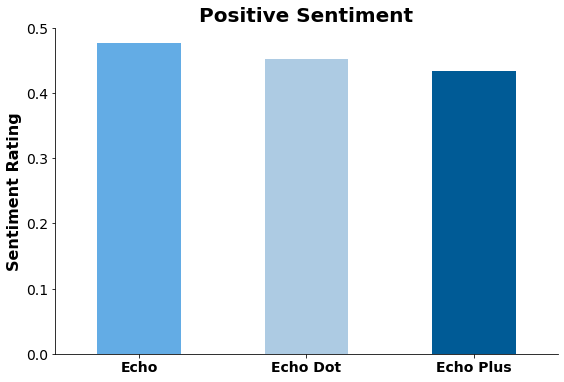

''

<Figure size 432x288 with 0 Axes>

In [76]:
#postive sentiment
color = ['#63ace5','#adcbe3','#005b96']
ax = all_vader.groupby("variation").pos.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Positive Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='0', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('postive.jpg')
;


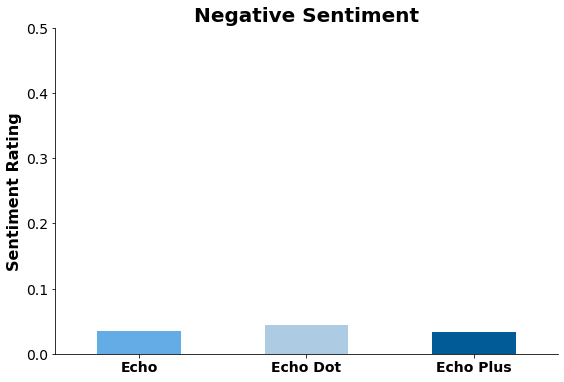

''

<Figure size 432x288 with 0 Axes>

In [75]:
#postive sentiment
color = ['#63ace5','#adcbe3','#005b96']
ax = all_vader.groupby("variation").neg.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Negative Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='0', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('negative_vader.jpg')
;
